In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

kaggle_spot_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
### not sure if i actually want to cut the data off at 1950, why not include everything from 1928 and on...... this is 1928 right now
#organizes columns in dataframe and eliminates songs before 1950
red_kaggle_spot_df=kaggle_spot_df[['id','name','artists','year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].loc[kaggle_spot_df['year']>=1928,:].reset_index(drop=True)


In [4]:

#agg mean of spotify metrics by year
annual_mean_metrics_df=red_kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').mean()

annual_mean_metrics_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
year,,,,,,,,,,
1928,0.946188,0.529696,0.207143,0.516979,0.177988,-17.316193,1.536771,0.135313,106.195246,0.492954
1929,0.591111,0.647005,0.240513,0.219461,0.235988,-16.607089,0.327922,0.485278,111.353988,0.638208
1930,0.943474,0.510382,0.327300,0.363377,0.217320,-12.685934,0.871555,0.079702,110.214356,0.618458
1931,0.875894,0.556094,0.258434,0.332011,0.239118,-15.903581,0.211690,0.233182,108.010281,0.571313
1932,0.940088,0.560051,0.305478,0.226418,0.236320,-13.288906,1.542797,0.141776,116.225833,0.593602
...,...,...,...,...,...,...,...,...,...,...
2016,0.280290,0.599976,0.592877,0.074646,0.180198,-7.949913,61.371254,0.107298,119.070344,0.430769
2017,0.289916,0.612286,0.586739,0.098209,0.194218,-8.422697,64.861500,0.111752,116.840278,0.414465
2018,0.271941,0.664930,0.590591,0.035948,0.171781,-7.253666,67.276000,0.128140,122.004325,0.447141


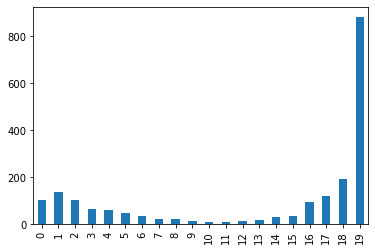

In [5]:
#review different years and different metrics to see if they're normally distributed or not, if they're not normal, you'll need to 

### make graphs for 6 different years for each metric to determine if we should use median



group_labels = []
for i in range(20):
    group_labels.append(str(i))

bin_start=0
bin_stop=1.05
bin_step=0.05

bins=np.arange(start=bin_start, stop=bin_stop, step=bin_step, dtype=float)

acoustic_bins=pd.cut(kaggle_spot_df.loc[kaggle_spot_df['year']==1945,:].acousticness,bins,labels=group_labels,include_lowest=True)


graphy=acoustic_bins.value_counts(sort=False)


graphy.plot(kind='bar')


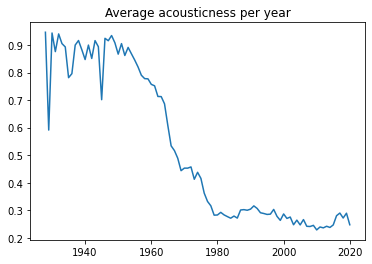

represents confidence the track is acoustic
------------------------
------------------------
------------------------


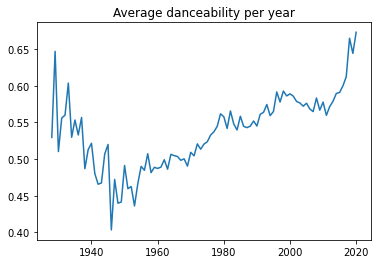

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
------------------------
------------------------
------------------------


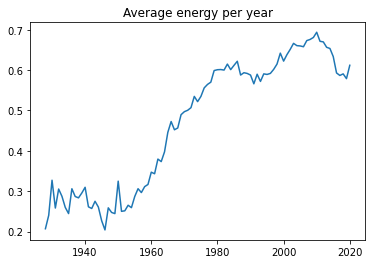

represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy
------------------------
------------------------
------------------------


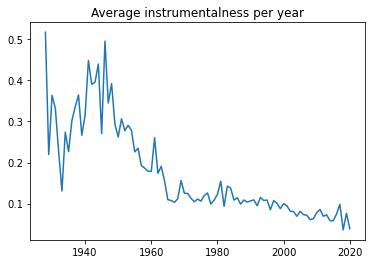

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly“vocal”
------------------------
------------------------
------------------------


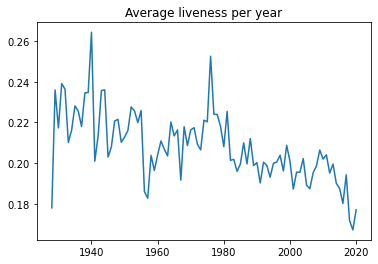

Detects the presence of an audience in the recording.
------------------------
------------------------
------------------------


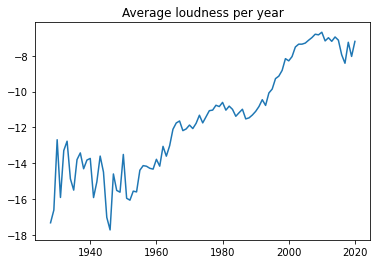

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
------------------------
------------------------
------------------------


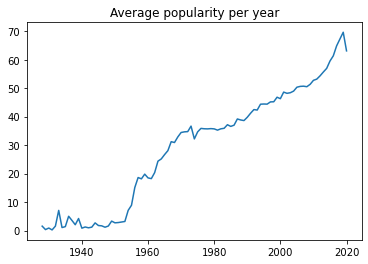

The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
------------------------
------------------------
------------------------


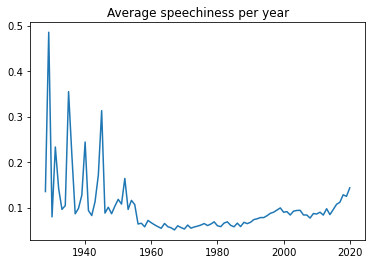

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry)
------------------------
------------------------
------------------------


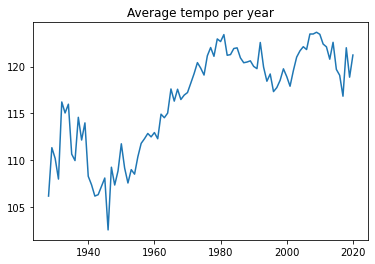

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
------------------------
------------------------
------------------------


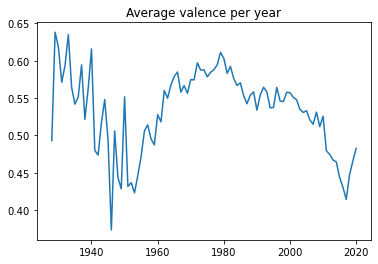

the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
------------------------
------------------------
------------------------


In [7]:
#turns the metric names into a list
spot_metric_names=annual_mean_metrics_df.columns.to_list()

### an explination of each metric
metric_descriptions_dict={
    spot_metric_names[0]:"represents confidence the track is acoustic",
    spot_metric_names[1]:'Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.',
    spot_metric_names[2]:'represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy',
    spot_metric_names[3]:'Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly“vocal”',
    spot_metric_names[4]:'Detects the presence of an audience in the recording.',
    spot_metric_names[5]:'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).',
    spot_metric_names[6]:'The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.',
    spot_metric_names[7]:'Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry)',
    spot_metric_names[8]:'The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.',
    spot_metric_names[9]:'the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'}


#generates a plot and description for each metric
for metric in spot_metric_names:
    plt.plot(annual_mean_metrics_df.index,annual_mean_metrics_df[metric])
    plt.title('Average '+metric+' per year')
    plt.show()
    print(metric_descriptions_dict[metric])
    print("------------------------")
    print("------------------------")
    print("------------------------")

In [8]:
## songs that are unique, popular, and stand out among other songs in a year
## conceptually, in this cell I want to look for popular songs in each year that broke the norm in regards the spotify metrics.
#look for outliers for each metric, we'll also want to compare those to popularity to see if any song's were unique (in regards to the metric) but also popular


# #creates a list of each year
# years_list=red_kaggle_spot_df['year'].unique().tolist()
# # print(type(years_list))
# years_list

#### the functions below find outlier songs within a given year for a specific spotify metric. The first finds all the outliers, the 'upper' finds the outliers on the top end, the 'lower' finds the ourliers on the bottom end


def outlier_songs(metric,year):
    # finds all the quartile related stats for each metric in a given year
    annual_q_stats_df=red_kaggle_spot_df.loc[red_kaggle_spot_df['year']==year,spot_metric_names].describe()
    #find outliers in the acousticness

    iqr=annual_q_stats_df[metric]['75%']-annual_q_stats_df[metric]['25%']
    iqr
    upperbound=annual_q_stats_df[metric]['75%']+(1.5*iqr)
    lowerbound=annual_q_stats_df[metric]['25%']-(1.5*iqr)

    # i could look at above average popularity or popularity above the 75 percentile
    avg_poularity=annual_q_stats_df['popularity']['mean']
    high_popularity=annual_q_stats_df['popularity']['75%']

    outliers_df=red_kaggle_spot_df.loc[(red_kaggle_spot_df['year']==year)&((red_kaggle_spot_df[metric]>upperbound)|(red_kaggle_spot_df[metric]<lowerbound)),:]
    outliers_df
    ### maybe i should look at popularity beyond an upper bound, instead of more than average popularity
    popular_outliers_df=outliers_df.loc[outliers_df['popularity']>avg_poularity]
    return popular_outliers_df


def upper_outlier_songs(metric,year):
    # finds all the quartile related stats for each metric in a given year
    annual_q_stats_df=red_kaggle_spot_df.loc[red_kaggle_spot_df['year']==year,spot_metric_names].describe()
    #find outliers in the acousticness

    iqr=annual_q_stats_df[metric]['75%']-annual_q_stats_df[metric]['25%']
    iqr
    upperbound=annual_q_stats_df[metric]['75%']+(1.5*iqr)
    lowerbound=annual_q_stats_df[metric]['25%']-(1.5*iqr)

    # i could look at above average popularity or popularity above the 75 percentile
    avg_poularity=annual_q_stats_df['popularity']['mean']
    high_popularity=annual_q_stats_df['popularity']['75%']


    outliers_df=red_kaggle_spot_df.loc[(red_kaggle_spot_df['year']==year)&((red_kaggle_spot_df[metric]>upperbound)),:]
    outliers_df
    ### maybe i should look at popularity beyond an upper bound, instead of more than average popularity
    popular_outliers_df=outliers_df.loc[outliers_df['popularity']>avg_poularity]
    return popular_outliers_df


def lower_outlier_songs(metric,year):
    # finds all the quartile related stats for each metric in a given year
    annual_q_stats_df=red_kaggle_spot_df.loc[red_kaggle_spot_df['year']==year,spot_metric_names].describe()
    #find outliers in the acousticness

    iqr=annual_q_stats_df[metric]['75%']-annual_q_stats_df[metric]['25%']
    iqr
    upperbound=annual_q_stats_df[metric]['75%']+(1.5*iqr)
    lowerbound=annual_q_stats_df[metric]['25%']-(1.5*iqr)

    # i could look at above average popularity or popularity above the 75 percentile
    avg_poularity=annual_q_stats_df['popularity']['mean']
    high_popularity=annual_q_stats_df['popularity']['75%']


    outliers_df=red_kaggle_spot_df.loc[(red_kaggle_spot_df['year']==year)&((red_kaggle_spot_df[metric]<lowerbound)),:]
    ### maybe i should look at popularity beyond an upper bound, instead of more than average popularity
    popular_outliers_df=outliers_df.loc[outliers_df['popularity']>avg_poularity]
    return popular_outliers


outlier_songs('acousticness',1928)

# upper_outlier_songs('energy',2010)
# lower_outlier_songs('energy',2010)


,id,name,artists,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
67,6rd3MB90B6JcMzSsxTVX5P,Where's the Mate for Me?,['John Raitt'],1928,0.947,0.333,0.146,0.000426,0.2650,-16.990,2,0.0353,75.372,0.234
78068,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",['Benny Goodman'],1928,0.847,0.626,0.744,0.892000,0.1450,-9.189,50,0.0662,113.117,0.259
78072,7fAa9rz4UmwuB4AGh50Gmp,St. James Infirmary,['Louis Armstrong & His Savoy Ballroom Five'],1928,0.902,0.693,0.182,0.000041,0.1530,-11.022,31,0.0514,116.508,0.588
78077,0bou6RS3Cy0p66cUX8bF68,Basin Street Blues,['Louis Armstrong & His Hot Five'],1928,0.811,0.579,0.164,0.000029,0.8620,-12.434,22,0.0510,109.720,0.366
78081,7ui11djxhp7WL4NCHlET8O,Hotter Than That,['Louis Armstrong & His Hot Five'],1928,0.894,0.782,0.409,0.278000,0.3090,-10.191,21,0.0676,106.030,0.907
78085,5PaW8VeYRpS3N728fFa15b,God Moves On the Water,['Blind Willie Johnson'],1928,0.943,0.557,0.271,0.002960,0.1380,-14.958,20,0.0397,188.196,0.685
78089,74UvZTPWPVAdaBvp6axd5G,On The Sunny Side Of The Street - Live,['Louis Armstrong'],1928,0.410,0.608,0.388,0.000002,0.9660,-10.991,21,0.0733,121.232,0.612
78091,3L9DoEtclyZ1wZKphdSqB0,St. Louis Blues,['Louis Armstrong'],1928,0.951,0.677,0.377,0.827000,0.1940,-9.638,17,0.1000,177.433,0.849
78092,3EkaPulwmdY2oEbVENXxq7,All Of Me,['Louis Armstrong'],1928,0.925,0.565,0.273,0.412000,0.0996,-12.350,21,0.0469,138.305,0.702
78095,0t8MJGXyTafKioG4fWDw9a,Summer Song,['Louis Armstrong'],1928,0.914,0.483,0.168,0.000000,0.0821,-17.214,19,0.0413,132.549,0.529


In [9]:
### use the functions above to create a dance playlist

headers=red_kaggle_spot_df.columns.to_list()




In [10]:

##### also, i'm wondering if i could/should use all the song id's to request the # of plays for each song from spotify's API
#### also, I'm wondering if we could weight each year(or era) by the average popularity of a song within that year(or era), and use it to compare spotify metrics accross years(or eras)